In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def detect_hand_and_fingers(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3),(1,1))
    img = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel)
    a = img.copy()
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,91, -9)
    dilate_sz = 3
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * dilate_sz, 2 * dilate_sz),(dilate_sz, dilate_sz))
    img = cv2.dilate(img, element,iterations = 1)
    return img

In [4]:
def detect_hand_silhoutte(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7),(3,3))
    img = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel)
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,191, 9)
    erode_sz = 5
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2 * erode_sz + 1, 2 * erode_sz + 1),(erode_sz, erode_sz))
    erosion = cv2.erode(img,kernel,iterations = 1)
    img = cv2.erode(img, element)
    dilate_sz = 3
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2 * dilate_sz + 1, 2 * dilate_sz + 1),(dilate_sz, dilate_sz))
    img = cv2.dilate(img, element, iterations = 1)

    cv2.bitwise_not(img, img)
    return img

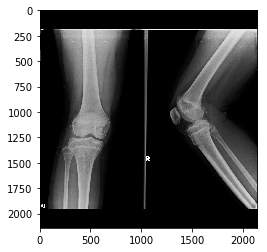

In [5]:
img = cv2.imread('./X_Ray_Data_set/Knee2Dto3D_120XRrays/Knee2Dto3D_120XRrays/stage0/1.jpg', 0)
#img = cv2.imread('./photo.jpg',0)
def show_img(img):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap='gray')
    plt.show()
show_img(img)

In [6]:
cv2.fastNlMeansDenoising(img, img,3, 7, 21)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

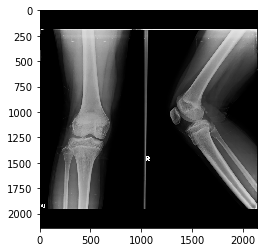

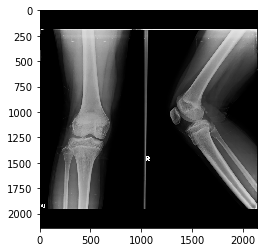

In [7]:
img2 = img.copy()
show_img(img)
show_img(img2)

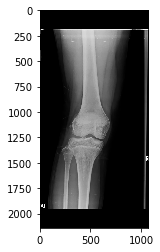

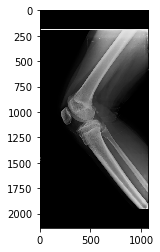

In [8]:
height, width = img.shape[:2]
start_row, start_col = int(0), int(0)
end_row, end_col = int(height), int(width*0.5)
left_img = img[start_row:end_row , start_col:end_col]
left_img2 = left_img.copy()
show_img(left_img) 

start_row, start_col = int(0), int(width*0.5)
end_row, end_col = int(height), int(width)
right_img = img[start_row:end_row , start_col:end_col]
right_img2 = right_img.copy()
show_img(right_img) 

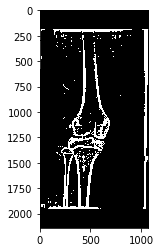

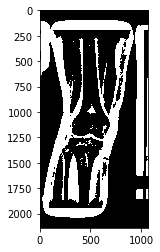

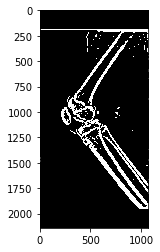

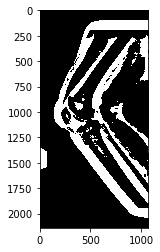

In [9]:
gray_l = detect_hand_and_fingers(left_img);show_img(gray_l)
gray_silhouette_l = detect_hand_silhoutte(left_img2);show_img(gray_silhouette_l)
gray_r = detect_hand_and_fingers(right_img);show_img(gray_r)
gray_silhouette_r = detect_hand_silhoutte(right_img2);show_img(gray_silhouette_r)

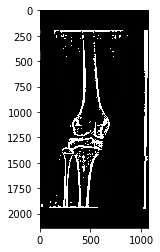

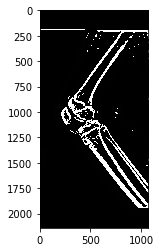

In [10]:
bones_l = gray_l - gray_silhouette_l;show_img(bones_l)
bones_r = gray_r - gray_silhouette_r;show_img(bones_r)

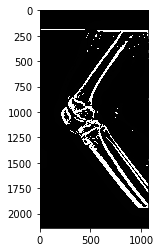

In [11]:
_ , contours_l, hierarchy = cv2.findContours(bones_l, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
_ , contours_r, hierarchy = cv2.findContours(bones_r, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(_, contours_r[-1], -1, (0,255,0), 0)
show_img(_)

In [12]:
contour_r = []
contour_l = []
contour_r = [_ for sublist in [a.tolist() for a in contours_r] for item in sublist for _ in item]
contour_l = [_ for sublist in [a.tolist() for a in contours_l] for item in sublist for _ in item]

In [13]:
contour_r

[[1066, 1591],
 [1065, 1592],
 [1064, 1592],
 [1064, 1593],
 [1064, 1594],
 [1064, 1595],
 [1064, 1596],
 [1064, 1597],
 [1064, 1598],
 [1064, 1599],
 [1064, 1600],
 [1064, 1601],
 [1065, 1601],
 [1066, 1602],
 [1067, 1601],
 [1068, 1601],
 [1069, 1601],
 [1069, 1600],
 [1069, 1599],
 [1069, 1598],
 [1069, 1597],
 [1069, 1596],
 [1069, 1595],
 [1069, 1594],
 [1069, 1593],
 [1069, 1592],
 [1068, 1592],
 [1067, 1591],
 [1067, 1572],
 [1066, 1573],
 [1065, 1573],
 [1065, 1574],
 [1065, 1575],
 [1065, 1576],
 [1065, 1577],
 [1065, 1578],
 [1065, 1579],
 [1065, 1580],
 [1065, 1581],
 [1065, 1582],
 [1065, 1583],
 [1065, 1584],
 [1066, 1585],
 [1067, 1585],
 [1068, 1584],
 [1069, 1584],
 [1069, 1583],
 [1069, 1582],
 [1069, 1581],
 [1069, 1580],
 [1069, 1579],
 [1069, 1578],
 [1069, 1577],
 [1069, 1576],
 [1069, 1575],
 [1069, 1574],
 [1069, 1573],
 [1068, 1573],
 [1067, 1541],
 [1066, 1542],
 [1065, 1542],
 [1065, 1543],
 [1065, 1544],
 [1066, 1544],
 [1067, 1545],
 [1068, 1544],
 [1069, 15

In [14]:
import json, codecs
#np_array_to_list = contours.tolist()
json_file = "point_l.json" 
json.dump(contour_l, codecs.open(json_file, 'w', encoding='utf-8'), sort_keys=True, indent=4)
josn_file = "point_r.json"
json.dump(contour_r, codecs.open(json_file, 'w', encoding='utf-8'), sort_keys=True, indent=4)